In [1]:
import os
os.chdir(r'C:\Users\MANI\Desktop\online-retail-data-clustering-main')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('online_retail_II.xlsx')

In [2]:
df.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#Show all columns on output
pd.set_option('display.max_columns',999)

df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.00,10.34,-9600.00,1.00,3.00,10.00,19152.00,107.42
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.00,4.69,-53594.36,1.25,2.10,4.21,25111.09,146.13
Customer ID,417534.00,15360.65,12346.00,13983.00,15311.00,16799.00,18287.00,1680.81


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Invoice,525461,28816,537434,675
StockCode,525461,4632,85123A,3516
Description,522533,4681,WHITE HANGING HEART T-LIGHT HOLDER,3549
Country,525461,40,United Kingdom,485852


Missing customer data

In [8]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [9]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [10]:
df['Invoice']=df['Invoice'].astype('str')
df[df['Invoice'].str.match('^\\d{6}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [11]:
# For checking if C is the only alphabet present in the invoice number
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [12]:
 df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
df['StockCode'] = df['StockCode'].astype('str')

In [14]:
df[df['StockCode'].str.match('^\\d{5}$') == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [15]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]
# + in the above statement means okay if the letter repeat.. 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.00,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [16]:
df[(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [17]:
# To check if we want to have these columns in our analysis: check the values in each of the columns
df[df['StockCode'].str.contains('DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [18]:
df[df['StockCode'].str.contains('DCGS0058')].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom
30671,491969,DCGS0058,MISO PRETTY GUM,1,2009-12-14 17:57:00,0.83,NaN,United Kingdom
31652,491970,DCGS0058,MISO PRETTY GUM,1,2009-12-14 18:03:00,0.83,NaN,United Kingdom


Data Cleaning:

In [19]:
df1 = df.copy()

In [20]:
df1['Invoice'] = df1['Invoice'].astype('str')
df1 = df1[df1['Invoice'].str.match('^\\d{6}$') == True]

In [21]:
df1 = df1[(df1['StockCode'].str.match('^\\d{5}$') == True) | (df1['StockCode'].str.match('^\\d{5}[A-Za-z]+$') == True) | (df1['StockCode'].str.contains('POST'))]

In [22]:
df1[df1['Price']<0] #Price is also cleaned but Quantity still has negative values

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [23]:
df1 = df1.dropna(subset='Customer ID')

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407061 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407061 non-null  object        
 1   StockCode    407061 non-null  object        
 2   Description  407061 non-null  object        
 3   Quantity     407061 non-null  int64         
 4   InvoiceDate  407061 non-null  datetime64[ns]
 5   Price        407061 non-null  float64       
 6   Customer ID  407061 non-null  float64       
 7   Country      407061 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [25]:
df1.describe().T #Quantity now has no negative values

,count,mean,min,25%,50%,75%,max,std
Quantity,407061.00,13.60,1.00,2.00,5.00,12.00,19152.00,96.92
InvoiceDate,407061,2010-07-01 10:31:56.322270976,2009-12-01 07:45:00,2010-03-26 14:01:00,2010-07-09 15:48:00,2010-10-14 17:09:00,2010-12-09 20:01:00,NaN
Price,407061.00,3.04,0.00,1.25,1.95,3.75,850.00,4.81
Customer ID,407061.00,15368.79,12346.00,13996.00,15321.00,16814.00,18287.00,1679.87


In [26]:
len(df1[df1['Price'] == 0])

28

In [27]:
# Filter out the 0 prices 
df1 = df1[df1['Price']>0]

In [28]:
float((len(df1)/len(df))*100)

77.46207615788802

Feature Engineering: RFM Analysis

In [29]:
df1['SalesLineTotal']=df1['Quantity']*df1['Price']

In [30]:
agg_df = df1.groupby('Customer ID', as_index=False) \
         .agg(
               Monetary_Value=('SalesLineTotal','sum'),
               Frequency=('Invoice','nunique'),
                LastInvoiceDate=('InvoiceDate','max')
         )
agg_df.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,222.16,1,2010-09-27 14:59:00
3,12349.00,2671.14,3,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [31]:
max_invoice_date = agg_df['LastInvoiceDate'].max()

In [32]:
agg_df['Recency'] = (max_invoice_date-agg_df['LastInvoiceDate']).dt.days

In [33]:
agg_df.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,222.16,1,2010-09-27 14:59:00,73
3,12349.00,2671.14,3,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


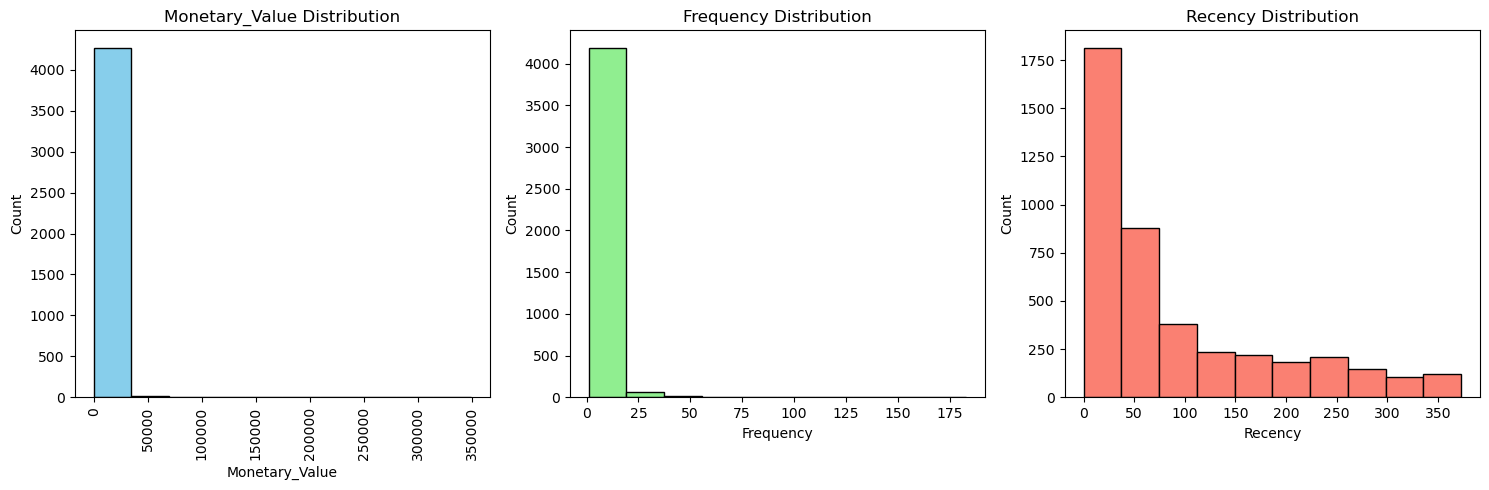

In [34]:
# to check out for the outliers
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(agg_df['Monetary_Value'],bins=10,color='skyblue',edgecolor='black')
plt.title('Monetary_Value Distribution')
plt.xlabel('Monetary_Value')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(1,3,2)
plt.hist(agg_df['Frequency'],bins=10,color='lightgreen',edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1,3,3)
plt.hist(agg_df['Recency'],bins=10,color='salmon',edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

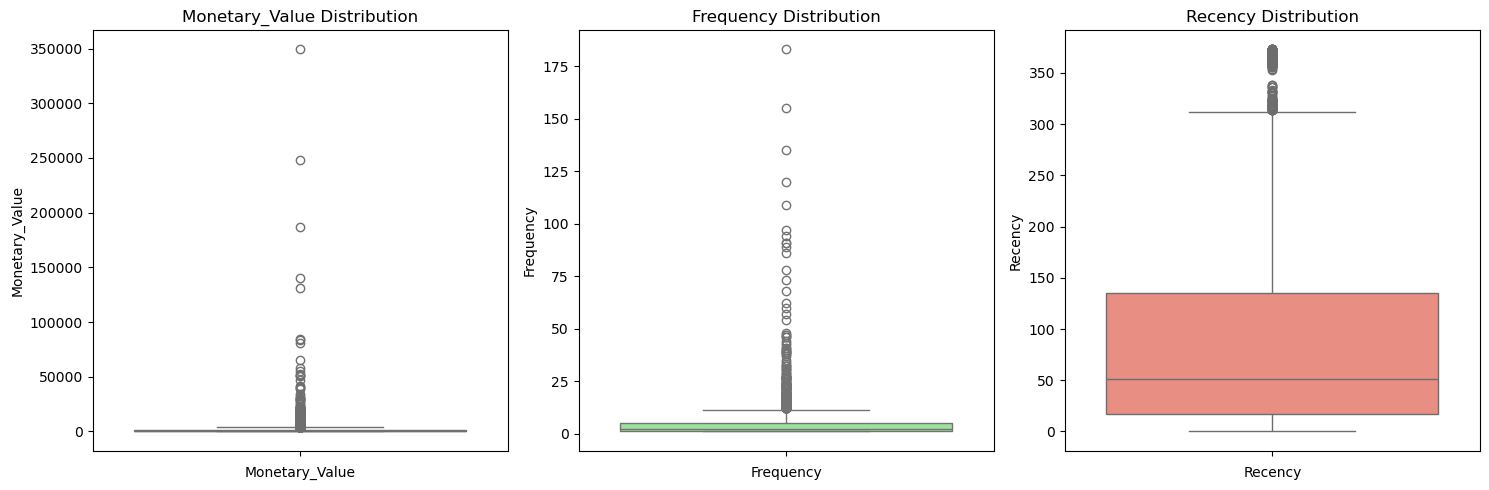

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=agg_df['Monetary_Value'],color='skyblue')
plt.title('Monetary_Value Distribution')
plt.xlabel('Monetary_Value')

plt.subplot(1,3,2)
sns.boxplot(data=agg_df['Frequency'],color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=agg_df['Recency'],color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [36]:
M_Q1 = agg_df['Monetary_Value'].quantile(0.25)
M_Q3 = agg_df['Monetary_Value'].quantile(0.75)
M_IQR = M_Q3-M_Q1
monetary_outliers = agg_df[(agg_df['Monetary_Value']>( M_Q3+M_IQR*1.5)) | (agg_df['Monetary_Value']<( M_Q1-M_IQR*1.5))].copy()

F_Q1 = agg_df['Frequency'].quantile(0.25)
F_Q3 = agg_df['Frequency'].quantile(0.75)
F_IQR = F_Q3-F_Q1
frequency_outliers = agg_df[(agg_df['Frequency']>( F_Q3+F_IQR*1.5)) | (agg_df['Frequency']<( F_Q1-F_IQR*1.5))].copy()


In [37]:
monetary_outliers.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer ID,420.00,15080.67,12357.00,13596.75,14927.00,16673.50,18260.00,1729.09
Monetary_Value,420.00,12300.87,3851.01,4615.45,6279.99,10398.63,349164.35,25927.89
Frequency,420.00,17.29,1.00,8.00,12.00,18.00,183.00,19.82
LastInvoiceDate,420,2010-11-09 16:32:02.285714432,2009-12-10 18:03:00,2010-11-08 15:20:00,2010-11-26 13:17:30,2010-12-06 11:11:00,2010-12-09 19:32:00,NaN
Recency,420.00,29.86,0.00,3.00,13.00,31.00,364.00,51.64


In [38]:
frequency_outliers.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer ID,283.00,15311.64,12422.00,13741.00,15311.00,16798.00,18260.00,1769.58
Monetary_Value,283.00,14326.01,1094.39,4331.56,6615.77,11680.49,349164.35,31197.85
Frequency,283.00,23.70,12.00,13.00,17.00,23.00,183.00,21.90
LastInvoiceDate,283,2010-11-23 09:40:01.272084480,2010-05-12 16:51:00,2010-11-19 15:09:00,2010-12-02 08:52:00,2010-12-07 10:29:30,2010-12-09 19:32:00,NaN
Recency,283.00,16.15,0.00,2.00,7.00,20.00,211.00,26.43


In [39]:
frequency_outliers.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency
55,12422.00,3369.79,12,2010-11-10 13:19:00,29
62,12431.00,4370.52,13,2010-12-01 10:03:00,8
66,12437.00,7731.99,21,2010-11-09 14:46:00,30
85,12471.00,20038.65,46,2010-11-30 14:35:00,9
86,12472.00,11308.48,13,2010-12-05 14:19:00,4


In [40]:
non_outlier_df = agg_df[(~agg_df.index.isin(monetary_outliers.index)) & (~agg_df.index.isin(frequency_outliers.index))]

In [41]:
n_df = non_outlier_df.copy()

In [42]:
n_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer ID,3812.00,15377.37,12346.00,13912.75,15390.50,16854.50,18287.00,1692.95
Monetary_Value,3812.00,892.81,1.55,282.59,591.47,1275.95,3817.18,826.22
Frequency,3812.00,2.87,1.00,1.00,2.00,4.00,11.00,2.24
LastInvoiceDate,3812,2010-09-03 08:53:08.452256,2009-12-01 09:55:00,2010-07-08 14:42:30,2010-10-12 15:43:30,2010-11-17 13:28:30,2010-12-09 20:01:00,NaN
Recency,3812.00,97.18,0.00,22.00,58.00,154.00,373.00,98.26


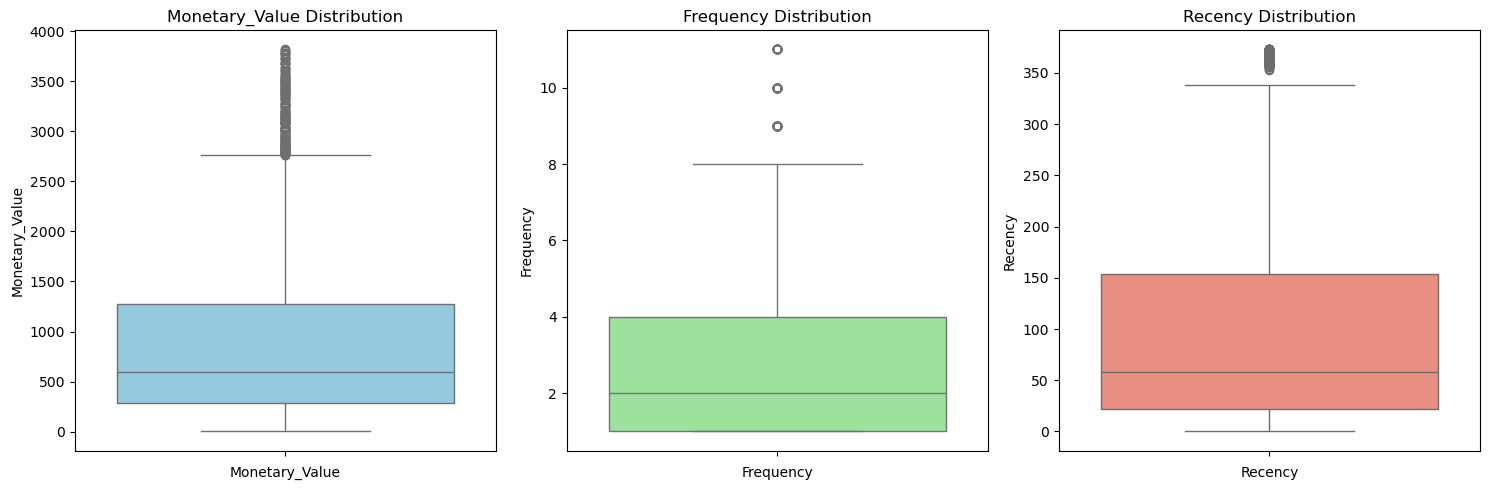

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data=n_df['Monetary_Value'],color='skyblue')
plt.title('Monetary_Value Distribution')
plt.xlabel('Monetary_Value')

plt.subplot(1,3,2)
sns.boxplot(data=n_df['Frequency'],color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1,3,3)
sns.boxplot(data=n_df['Recency'],color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

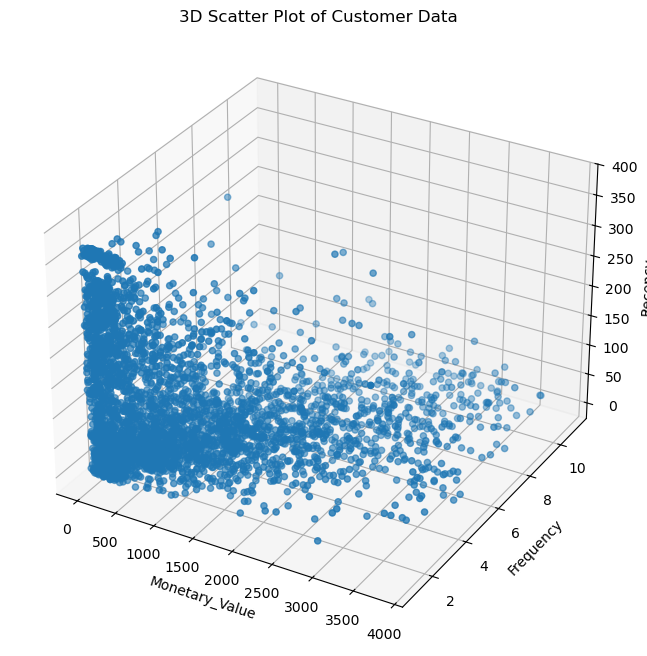

In [44]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(n_df['Monetary_Value'], n_df['Frequency'],n_df['Recency'])
ax.set_xlabel('Monetary_Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaled_data = scaler.fit_transform(n_df[['Monetary_Value','Frequency','Recency']])
s_df = pd.DataFrame(scaled_data,index=n_df.index, columns=['Monetary_Value','Frequency','Recencey'])

In [46]:
s_df

,Monetary_Value,Frequency,Recencey
0,-0.88,-0.39,0.68
1,0.52,-0.39,-0.97
2,-0.81,-0.83,-0.25
3,2.15,0.06,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4282,-0.30,1.40,-0.82
4283,-0.58,-0.83,-0.32
4284,-0.62,-0.83,2.01
4285,0.43,-0.39,0.14


In [47]:
s_df.head()

,Monetary_Value,Frequency,Recencey
0,-0.88,-0.39,0.68
1,0.52,-0.39,-0.97
2,-0.81,-0.83,-0.25
3,2.15,0.06,-0.56
4,-0.72,-0.83,-0.89


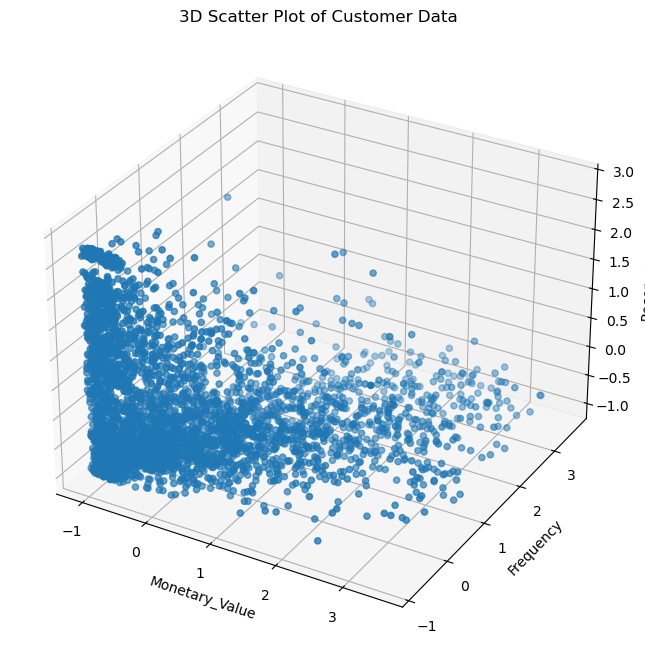

In [48]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
scatter = ax.scatter(s_df['Monetary_Value'], s_df['Frequency'],s_df['Recencey'])
ax.set_xlabel('Monetary_Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recencey')
ax.set_title('3D Scatter Plot of Customer Data')
plt.show()

K_Means_Clustering:

In [49]:
max_k = 12 #upper limit for the value of K

C:\Users\MANI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\MANI\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\MANI\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MANI\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\MANI\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

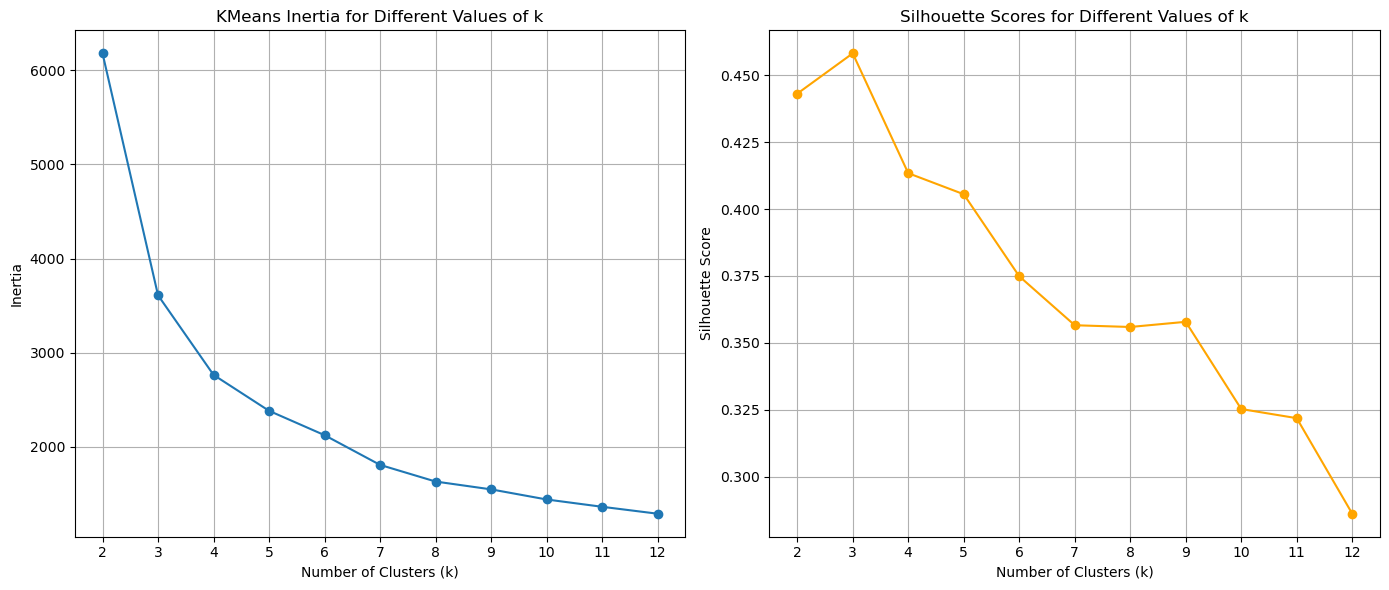

In [50]:
from sklearn.metrics import silhouette_score

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(s_df)
    sil_score = silhouette_score(s_df, cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


In [51]:
k_mean = KMeans(n_clusters = 4, random_state = 42, max_iter = 1000)
cluster_labels = k_mean.fit_predict(s_df)
cluster_labels

array([3, 0, 2, ..., 3, 0, 0])

In [52]:
n_df['Cluster Labels'] = cluster_labels
n_df

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency,Cluster Labels
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,222.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4282,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4283,18284.00,411.68,1,2010-10-04 11:33:00,66,2
4284,18285.00,377.00,1,2010-02-17 10:24:00,295,3
4285,18286.00,1246.43,2,2010-08-20 11:57:00,111,0


In [53]:
n_df['Cluster Labels'].unique()

array([3, 0, 2, 1])

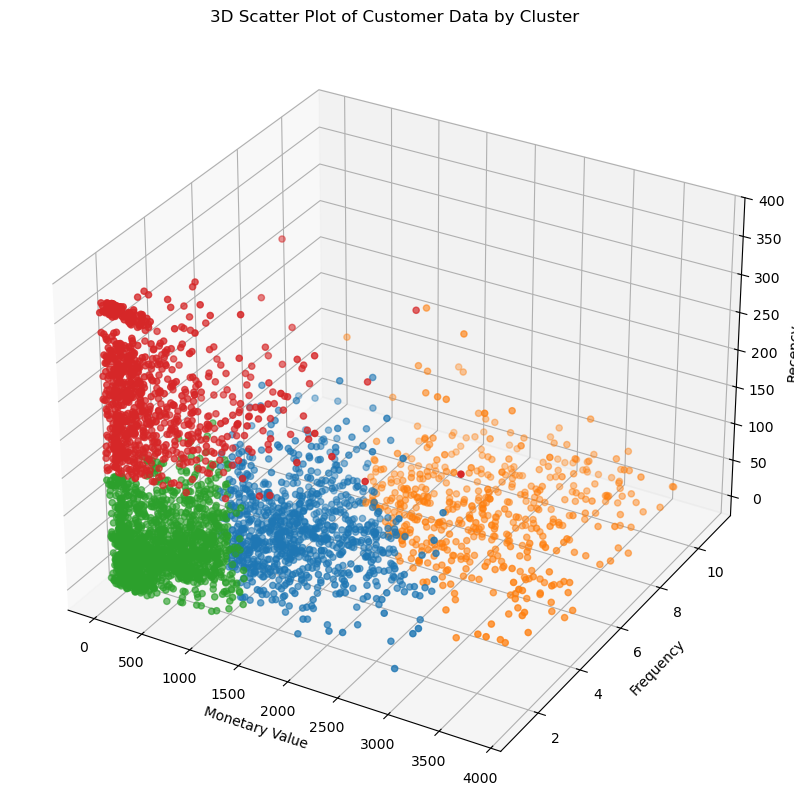

In [54]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = n_df['Cluster Labels'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(n_df['Monetary_Value'], 
                     n_df['Frequency'], 
                     n_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

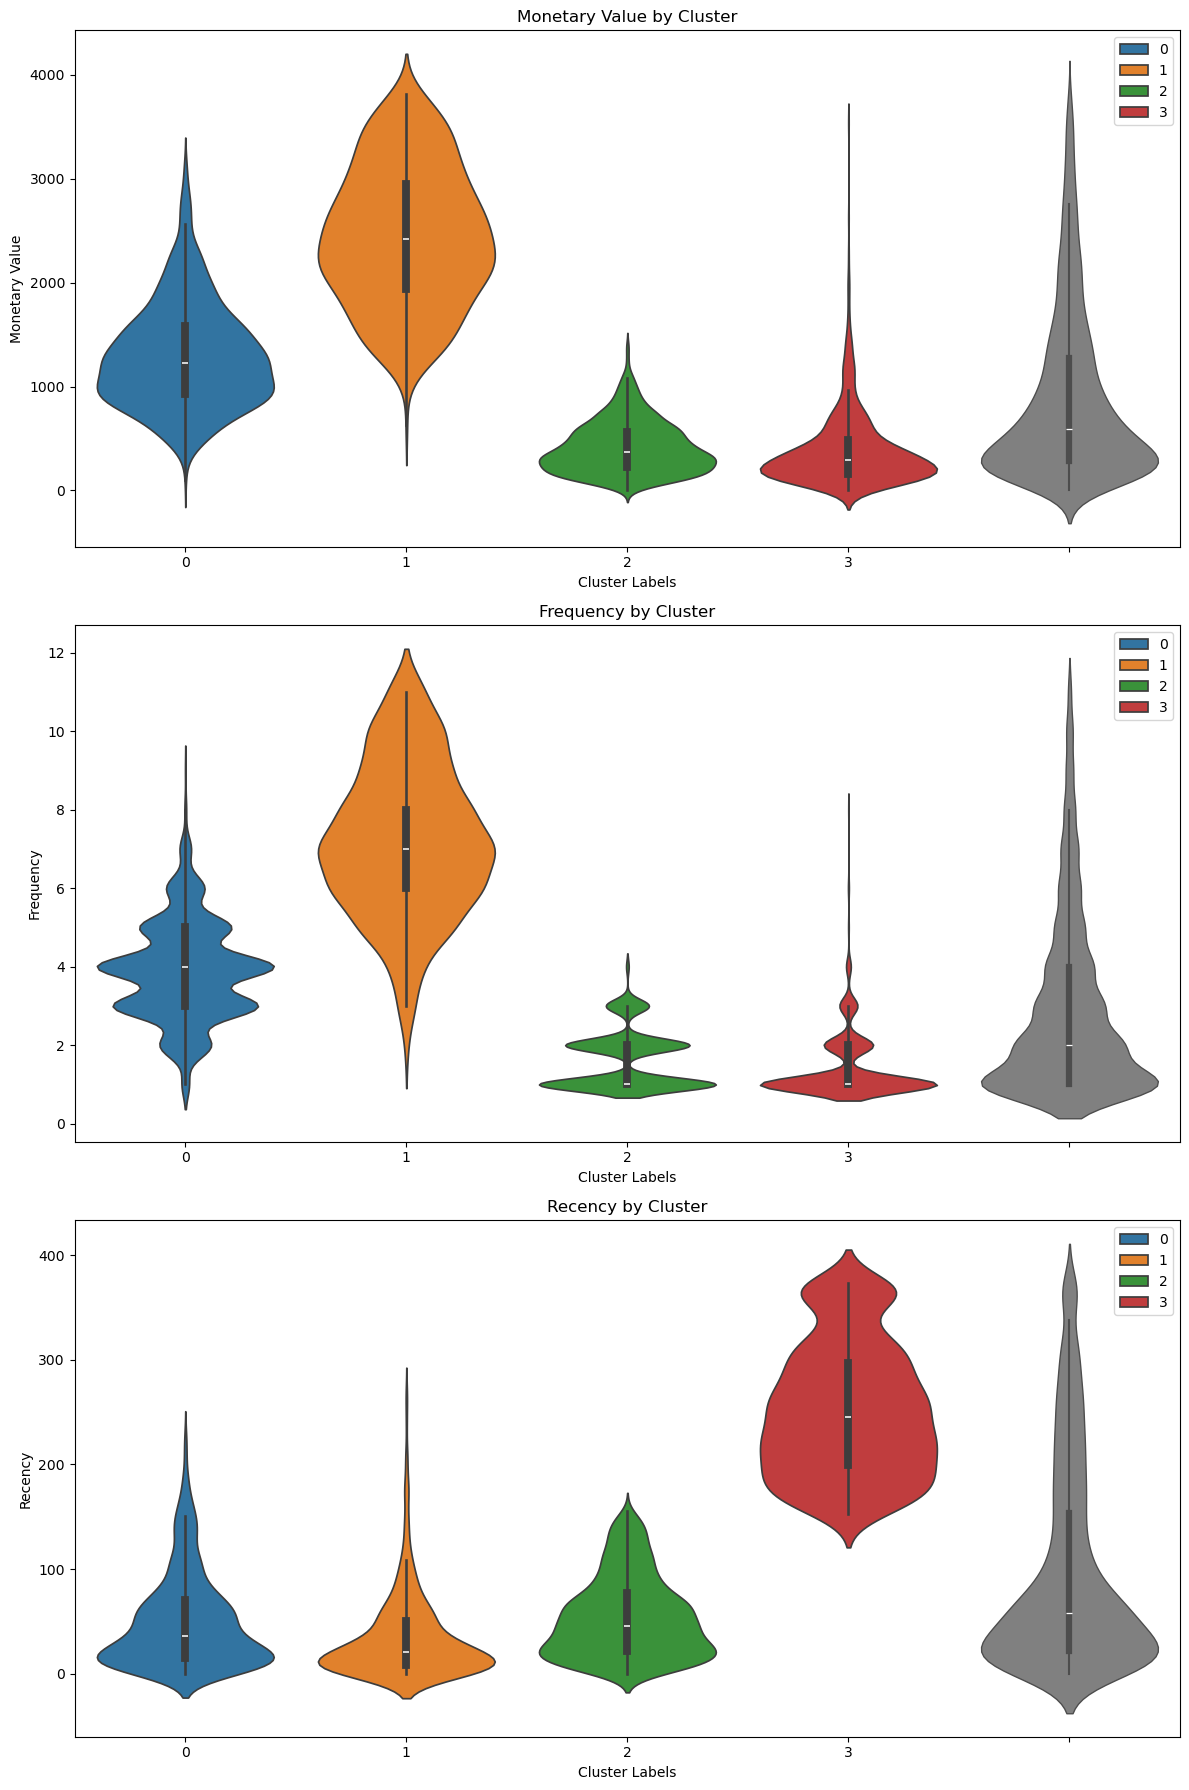

In [55]:
plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=n_df['Cluster Labels'],y=n_df['Monetary_Value'],palette=cluster_colors, hue=n_df['Cluster Labels'])
sns.violinplot(y=n_df['Monetary_Value'],color='gray',linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=n_df['Cluster Labels'],y=n_df['Frequency'],palette=cluster_colors, hue=n_df["Cluster Labels"])
sns.violinplot(y=n_df['Frequency'],color='gray',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=n_df['Cluster Labels'],y=n_df['Recency'],palette=cluster_colors, hue=n_df["Cluster Labels"])
sns.violinplot(y=n_df['Recency'],color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Re-Engage"
* Cluster 2 (Green): "Nurture"
* Cluster 3 (Red): "Reward"

In [59]:
# Taking monetary outliers and frequency outliers which would be common for both into account
overlap_indices = monetary_outliers.index.intersection(frequency_outliers.index)
monetary_only_outliers = monetary_outliers.drop(overlap_indices)
frequency_only_outliers = frequency_outliers.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers.loc[overlap_indices]

monetary_only_outliers['Cluster Label'] = -1
frequency_only_outliers['Cluster Label'] = -2
monetary_and_frequency_outliers['Cluster Label'] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers,frequency_only_outliers,monetary_and_frequency_outliers])

In [61]:
outlier_clusters_df.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency,Cluster Label
9,12357.00,12079.99,2,2010-11-16 14:29:00,23,-1
26,12380.00,5442.84,6,2010-08-31 14:54:00,100,-1
43,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
49,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
63,12433.00,7205.39,5,2010-12-08 16:49:00,1,-1


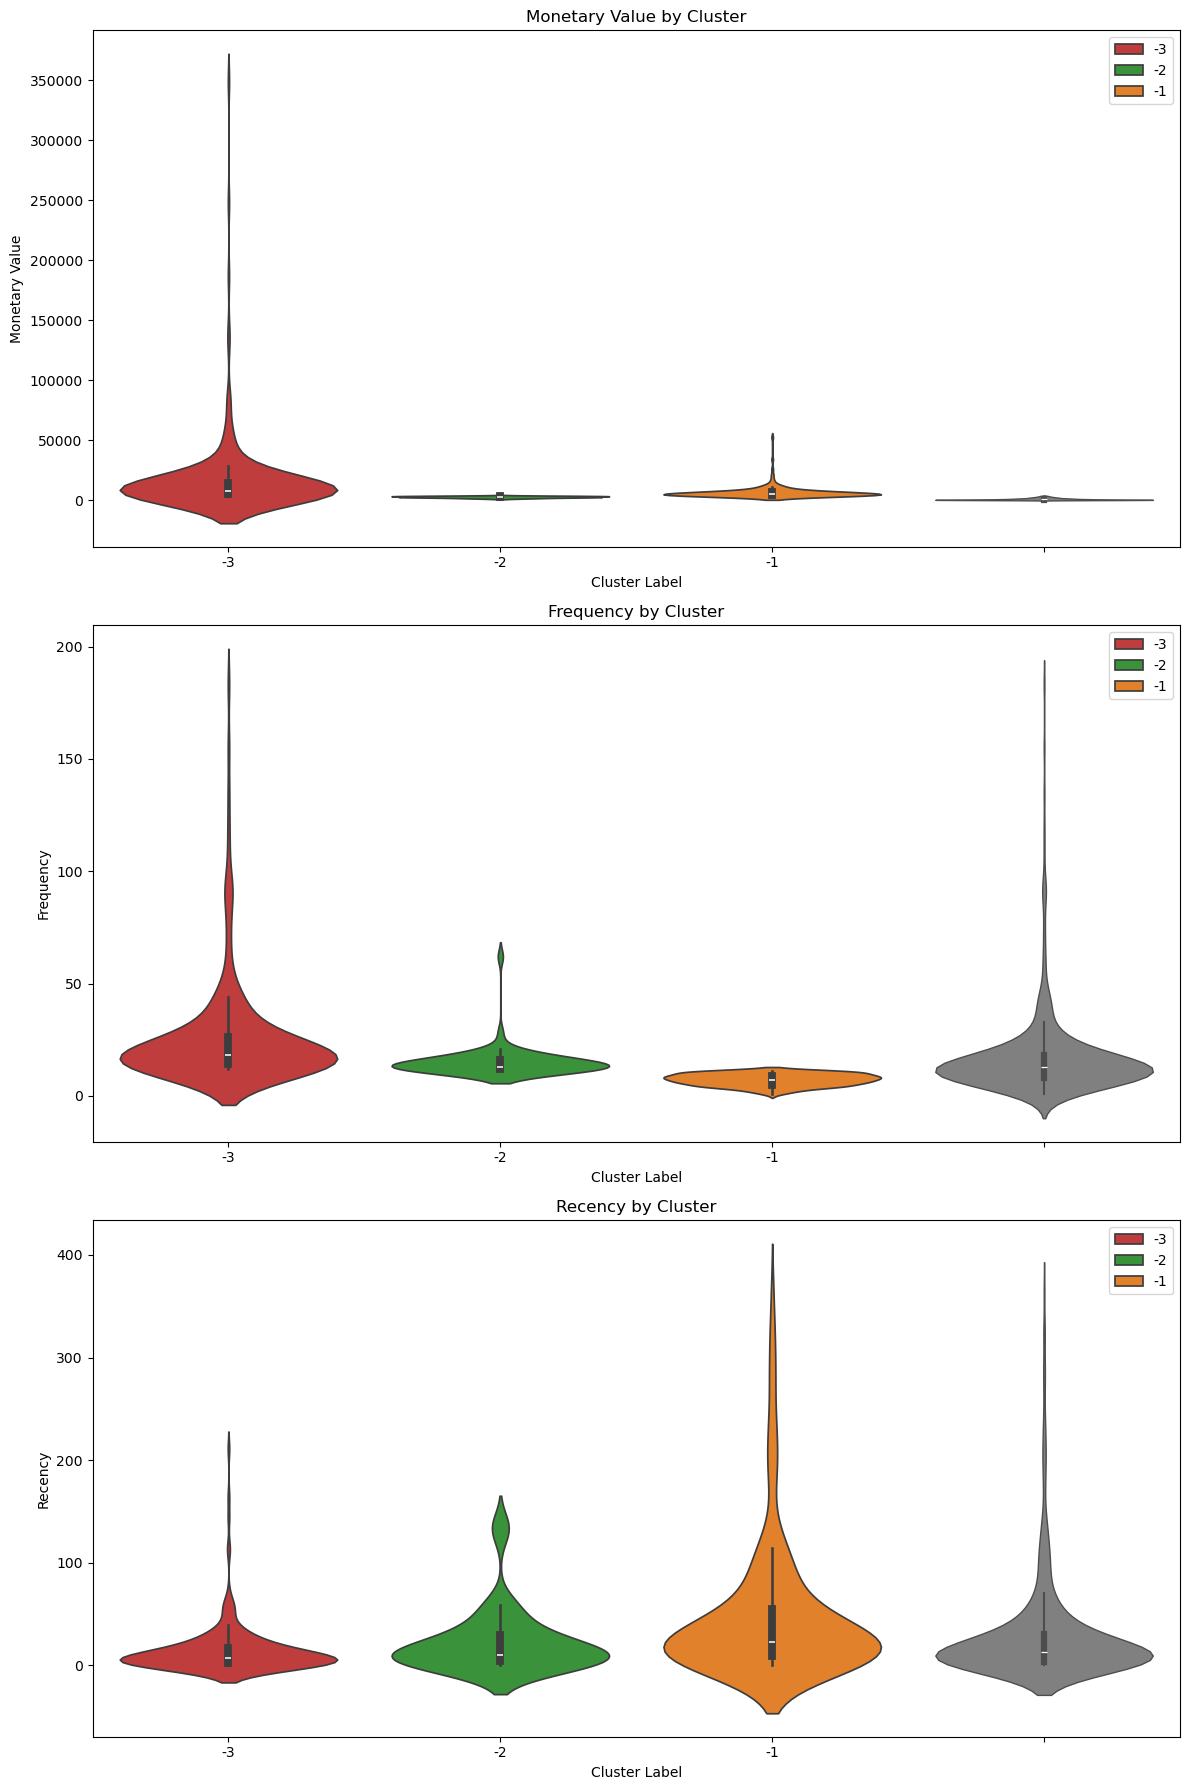

In [63]:
cluster_colors = {-1: '#ff7f0e',  # Orange
                  -2: '#2ca02c',  # Green
                  -3: '#d62728'}  # Red

plt.figure(figsize=(12,18))
plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df['Cluster Label'],y=outlier_clusters_df['Monetary_Value'],palette=cluster_colors, hue=outlier_clusters_df['Cluster Label'])
sns.violinplot(y=n_df['Monetary_Value'],color='gray',linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df['Cluster Label'],y=outlier_clusters_df['Frequency'],palette=cluster_colors, hue=outlier_clusters_df['Cluster Label'])
sns.violinplot(y=outlier_clusters_df['Frequency'],color='gray',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df['Cluster Label'],y=outlier_clusters_df['Recency'],palette=cluster_colors, hue=outlier_clusters_df['Cluster Label'])
sns.violinplot(y=outlier_clusters_df['Recency'],color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [95]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [96]:
d_df = n_df.copy()
d_df = d_df.drop(columns='Cluster Labels')
d_df['Cluster Label'] = n_df['Cluster Labels'].copy()
full_clusterings = pd.concat([d_df,outlier_clusters_df])

In [100]:
full_clusterings['Cluster_Label'] = full_clusterings['Cluster Label'].map(cluster_labels)

In [101]:
full_clusterings.head()

,Customer ID,Monetary_Value,Frequency,LastInvoiceDate,Recency,Cluster Label,Cluster_Label
0,12346.00,169.36,2,2010-06-28 13:53:00,164,3,REWARD
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,222.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00,2671.14,3,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,NURTURE


Visualizations

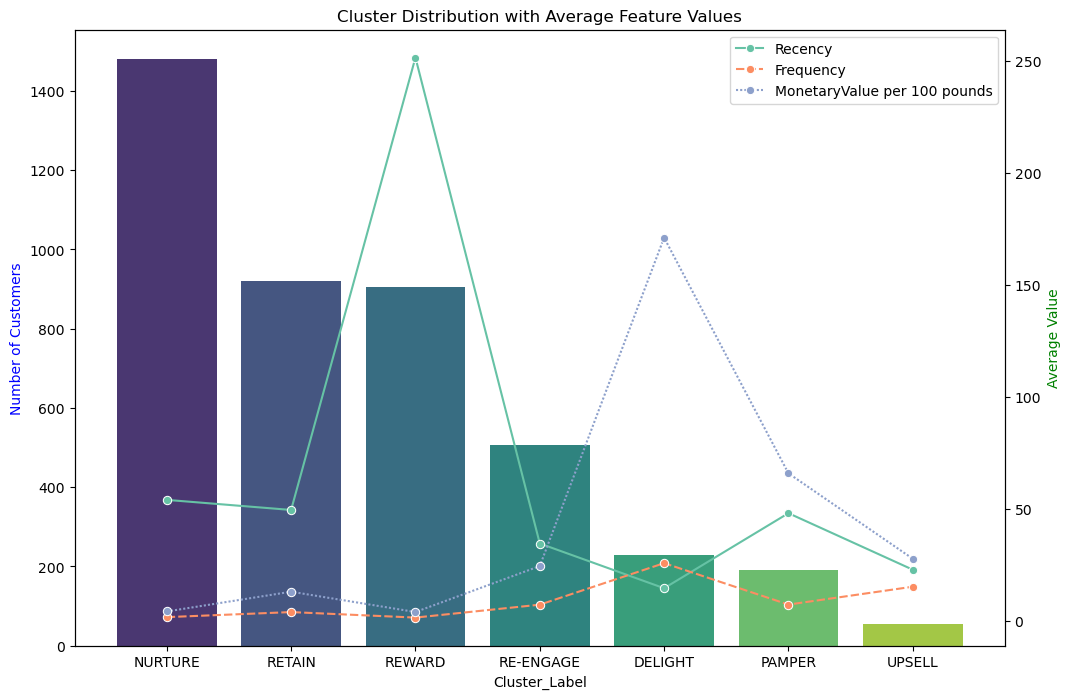

In [102]:
cluster_counts = full_clusterings['Cluster_Label'].value_counts()
full_clusterings["MonetaryValue per 100 pounds"] = full_clusterings["Monetary_Value"] / 100.00
feature_means = full_clusterings.groupby('Cluster_Label')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx() # add a secondary axis to represent another value on y-axis as well

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()